In [ ]:
!pip install xlrd

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd

In [79]:
dataframe=pd.read_excel('D:\SaturdaysIA\EquipoCoral_RecoprecioIA\data_preprocessing\EDA\dataleer.xls',skiprows=7)

In [80]:
columns=dataframe.columns

In [81]:
dataframe.head()

,Año,Mes,Fecha_Pub_DOF,Clave ciudad,Nombre ciudad,División,Grupo,Clase,Subclase,Clave generico,Generico,Consecutivo,Especificación,Precio promedio,Cantidad,Unidad,Estatus
0,2020,10,NaN,1,Área Met. de la Cd. de México,"1. Alimentos, bebidas y tabaco",1.1. Alimentos,"1.1.1. Pan, tortillas y cereales",04 Arroz y cereales preparados,1,Arroz,1,"VERDE VALLE, INTEGRAL, BOLSA DE 900 GR",32.00,1,KG,NaN
1,2020,10,NaN,1,Área Met. de la Cd. de México,"1. Alimentos, bebidas y tabaco",1.1. Alimentos,"1.1.1. Pan, tortillas y cereales",04 Arroz y cereales preparados,1,Arroz,2,"VERDE VALLE, BLANCO, SUPER EXTRA, BOLSA DE 1 KG",36.23,1,KG,NaN
2,2020,10,NaN,1,Área Met. de la Cd. de México,"1. Alimentos, bebidas y tabaco",1.1. Alimentos,"1.1.1. Pan, tortillas y cereales",04 Arroz y cereales preparados,1,Arroz,3,"MORELOS, BLANCO, SUPER EXTRA, BOLSA DE 1 KG",34.00,1,KG,NaN
3,2020,10,NaN,1,Área Met. de la Cd. de México,"1. Alimentos, bebidas y tabaco",1.1. Alimentos,"1.1.1. Pan, tortillas y cereales",04 Arroz y cereales preparados,1,Arroz,4,"MP, BLANCO, SUPER EXTRA, BOLSA DE 900 GR",21.94,1,KG,NaN
4,2020,10,NaN,1,Área Met. de la Cd. de México,"1. Alimentos, bebidas y tabaco",1.1. Alimentos,"1.1.1. Pan, tortillas y cereales",04 Arroz y cereales preparados,1,Arroz,5,"VALLE VERDE, BLANCO, SUPER EXTRA, BOLSA DE 900 GR",44.44,1,KG,NaN


# El producto mas caro por generico

In [82]:
g = dataframe.groupby('Clase')
g.groups.keys()

dict_keys(['1.1.1. Pan, tortillas y cereales', '1.1.2. Carnes', '1.1.3. Pescados y mariscos', '1.1.4. Leche, derivados de leche y huevo', '1.1.5. Aceites y grasas comestibles', '1.1.6. Frutas y hortalizas', '1.1.7. Azúcar, café y refrescos envasados', '1.1.8. Otros alimentos', '1.2.1. Bebidas alcohólicas', '1.2.2. Tabaco', '2.1.1. Ropa hombre', '2.1.2. Ropa mujer', '2.1.3. Ropa para niños y bebés', '2.1.4. Ropa de abrigo y uniformes escolares', '2.2.1. Calzado', '2.3.1. Cuidados del vestido y accesorios', '4.1.1. Muebles', '4.1.2. Aparatos', '4.2.1. Accesorios y utensilios', '4.2.2. Detergentes y productos similares'])

In [83]:
maximos=[]
for i in g.groups.keys():
    maximos.append(g.get_group(i).sort_values(by=['Precio promedio'], ascending=False).head(1))
data_top=pd.concat(maximos)

In [86]:
maximos[2]

,Año,Mes,Fecha_Pub_DOF,Clave ciudad,Nombre ciudad,División,Grupo,Clase,Subclase,Clave generico,Generico,Consecutivo,Especificación,Precio promedio,Cantidad,Unidad,Estatus
7730,2020,10,NaN,4,"Guadalajara, Jal.","1. Alimentos, bebidas y tabaco",1.1. Alimentos,1.1.3. Pescados y mariscos,10 Pescados y mariscos en conserva,29,Otros pescados y mariscos en conserva,4,"VIGILANTE, EN CONSERVA, ANCHOAS, ACEITE DE OLI...",1801.04,1,KG,NaN


In [90]:
data_top.shape

(20, 17)

In [87]:
data_top

,Año,Mes,Fecha_Pub_DOF,Clave ciudad,Nombre ciudad,División,Grupo,Clase,Subclase,Clave generico,Generico,Consecutivo,Especificación,Precio promedio,Cantidad,Unidad,Estatus
27181,2020,10,NaN,17,"Villahermosa, Tab.","1. Alimentos, bebidas y tabaco",1.1. Alimentos,"1.1.1. Pan, tortillas y cereales",02 Pan,13,Pastelillos y pasteles a granel,3,"PASTEL, DE TRES LECHES C/CHOCOLATE, PZA DE 250 GR",1600.00,1,KG,NaN
30305,2020,10,NaN,19,"Chihuahua, Chih.","1. Alimentos, bebidas y tabaco",1.1. Alimentos,1.1.2. Carnes,"08 Carnes frías, secas y embutidos",19,"Carnes secas, procesadas y otros embutidos",5,"LA ESTAMPIDA, CARNE SECA, TROZO, BOLSA DE 20 GR",1625.00,1,KG,NaN
7730,2020,10,NaN,4,"Guadalajara, Jal.","1. Alimentos, bebidas y tabaco",1.1. Alimentos,1.1.3. Pescados y mariscos,10 Pescados y mariscos en conserva,29,Otros pescados y mariscos en conserva,4,"VIGILANTE, EN CONSERVA, ANCHOAS, ACEITE DE OLI...",1801.04,1,KG,NaN
27430,2020,10,NaN,17,"Villahermosa, Tab.","1. Alimentos, bebidas y tabaco",1.1. Alimentos,"1.1.4. Leche, derivados de leche y huevo",13 Derivados de leche,37,Otros quesos,2,"CAPRICE DES DIEUX, O/QUESOS, BRIE, PAQ DE 125 GR",1244.00,1,KG,NaN
57253,2020,10,NaN,39,"Querétaro, Qro.","1. Alimentos, bebidas y tabaco",1.1. Alimentos,1.1.5. Aceites y grasas comestibles,15 Aceites y grasas vegetales comestibles,43,Aceites y grasas vegetales comestibles,5,"IBARRA, ACEITE, DE OLIVA, BOTELLA DE 200 ML",595.00,1,LT,NaN
31859,2020,10,NaN,20,"Hermosillo, Son.","1. Alimentos, bebidas y tabaco",1.1. Alimentos,1.1.6. Frutas y hortalizas,18 Legumbres secas,65,Chile seco,4,"SAHUARO MP, CHILTEPIN, BOLSA DE 20 GR",1968.75,1,KG,NaN
22653,2020,10,NaN,13,"Tapachula, Chis.","1. Alimentos, bebidas y tabaco",1.1. Alimentos,"1.1.7. Azúcar, café y refrescos envasados",21 Café,97,Té,5,"YOGI, DESHIDRATADO, CHAI VERDE, CAJA DE 16 GR,...",6099.75,1,KG,NaN
21176,2020,10,NaN,12,"San Luis Potosí, S.L.P.","1. Alimentos, bebidas y tabaco",1.1. Alimentos,1.1.8. Otros alimentos,23 Condimentos,92,Otros condimentos,2,"IET, ESPECIAS, CANELA, EN TROZO, FCO DE 30 GR",3201.33,1,KG,NaN
21293,2020,10,NaN,12,"San Luis Potosí, S.L.P.","1. Alimentos, bebidas y tabaco",1.2. Bebidas alcohólicas y tabaco,1.2.1. Bebidas alcohólicas,27 Vinos y licores,104,Ron,3,"ZACAPA, SOLERA, BOTELLA DE 750 ML",3286.12,1,LT,NaN
49297,2020,10,NaN,33,"Tulancingo, Hgo.","1. Alimentos, bebidas y tabaco",1.2. Bebidas alcohólicas y tabaco,1.2.2. Tabaco,28 Cigarrillos,108,Cigarrillos,2,"MARLBORO, C/FILTRO, PAQ C/10 CAJETILLAS DE 20 ...",625.00,1,PAQ,NaN


[Text(0.5, 0, 'Precio promedio'), Text(0, 0.5, 'Especificación')]

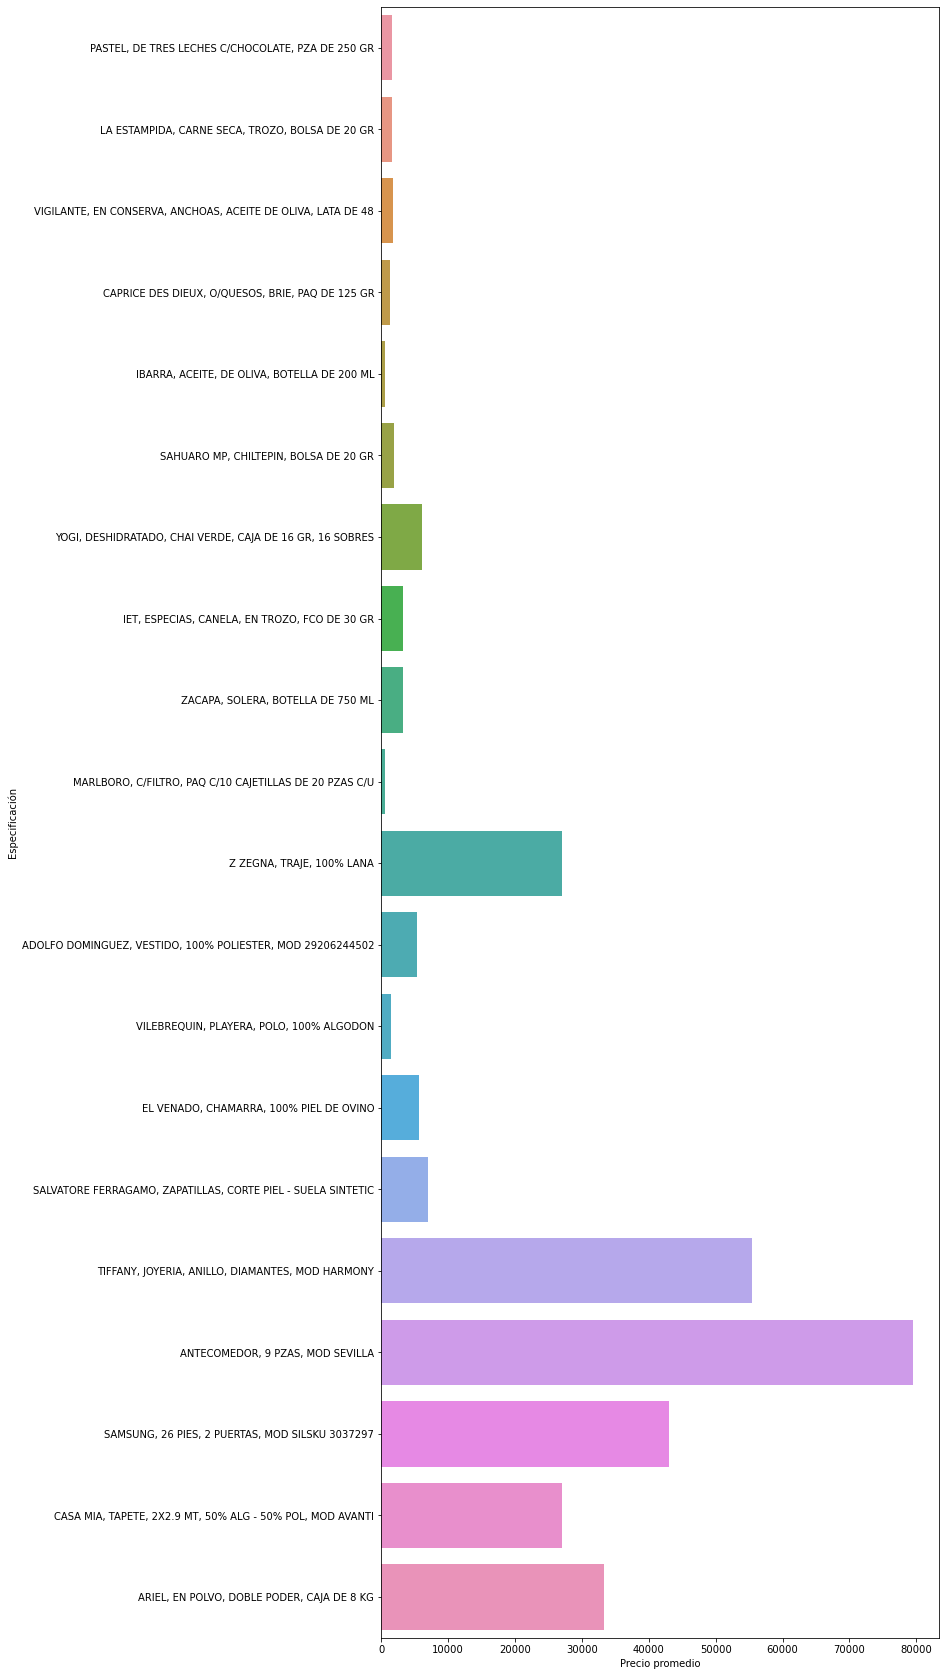

In [97]:
plt.figure(figsize=(10,30))
ax = sns.barplot(x="Precio promedio", y="Especificación" ,data=data_top )
#ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Precio promedio", ylabel="Especificación")

# Mapas

In [14]:
map_df = gpd.read_file('D:\documentos\proyects\gloglo\mapa\México_Estados.shp')

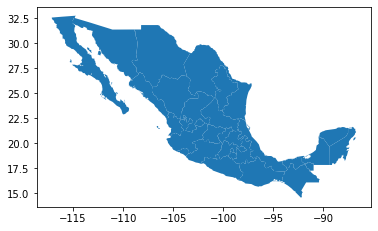

In [15]:
map_df.plot()

In [25]:
map_df.sort_values(by=['ESTADO'])

,CODIGO,ESTADO,geometry
4,MX01,Aguascalientes,POLYGON ((-101.8461990356445 22.01176071166992...
0,MX02,Baja California,(POLYGON ((-113.1397171020508 29.0177764892578...
1,MX03,Baja California Sur,(POLYGON ((-111.2061233520508 25.8027763366699...
14,MX04,Campeche,(POLYGON ((-91.83445739746094 18.6380538940429...
21,MX05,Chiapas,"POLYGON ((-91.4375 17.24110794067383, -91.3527..."
23,MX06,Chihuahua,POLYGON ((-108.4712982177734 26.96133041381836...
24,MX07,Coahuila,POLYGON ((-103.2901458740234 28.99773216247559...
11,MX08,Colima,POLYGON ((-103.7454833984375 18.68806838989258...
10,MX09,Distrito Federal,POLYGON ((-99.28486633300781 19.14244079589844...
26,MX10,Durango,POLYGON ((-104.3114013671875 22.31921005249023...


In [23]:
dict_estado=estado=map_df['ESTADO']

In [22]:
ciudades=dataframe[['Nombre ciudad', 'Precio promedio']]
dict_ciudades=set(ciudades['Nombre ciudad'])

In [27]:
dct={'Acapulco, Gro.':'Guerrero',
 'Aguascalientes, Ags.':'Aguascalientes',
 'Campeche, Camp.':'Campeche',
 'Cd. Juárez, Chih.':'Chihuahua',
 'Chetumal, Q. Roo.':'Quintana Roo',
 'Chihuahua, Chih.':'Chihuahua',
 'Colima, Col.':'Colima',
 'Cortazar, Gto.':'Guanajuato',
 'Cuernavaca, Mor.':'Morelos',
 'Culiacán, Sin.':'Sinaloa',
 'Córdoba, Ver.':'Veracruz',
 'Durango, Dgo.':'Durango',
 'Fresnillo, Zac.':'Zacatecas',
 'Guadalajara, Jal.':'Jalisco',
 'Hermosillo, Son.':'Jalisco',
 'Huatabampo, Son.':'Jalisco',
 'Iguala, Gro.':'Guerrero',
 'Jacona, Mich.':'Michoacán',
 'Jiménez, Chih.':'Chihuahua',
 'La Paz, B.C.S.':'Baja California Sur',
 'León, Gto.':'Guanajuato',
 'Matamoros, Tamps.':'Tamaulipas',
 'Mexicali, B.C.':'Baja California',
 'Monclova, Coah.':'Coahuila',
 'Monterrey, N.L.':'Nuevo León',
 'Morelia, Mich.':'Michoacán',
 'Mérida, Yuc.':'Yucatán',
 'Oaxaca, Oax.':'Oaxaca',
 'Puebla, Pue.':'Puebla',
 'Querétaro, Qro.':'Querétaro',
 'San Andrés Tuxtla, Ver.':'Veracruz',
 'San Luis Potosí, S.L.P.':'San Luis Potosí',
 'Tampico, Tamps.':'Tamaulipas',
 'Tapachula, Chis.':'Chiapas',
 'Tepatitlán, Jal.':'Jalisco',
 'Tepic, Nay.':'Nayarit	',
 'Tijuana, B.C.':'Baja California',
 'Tlaxcala, Tlax.':'Tlaxcala',
 'Toluca, Edo. de Méx.':'México',
 'Torreón, Coah.':'Coahuila',
 'Tulancingo, Hgo.':'Hidalgo',
 'Veracruz, Ver.':'Veracruz',
 'Villahermosa, Tab.':'Tabasco',
 'Área Met. de la Cd. de México':'Distrito Federal'}

In [29]:
ciudades['Nombre ciudad']=ciudades['Nombre ciudad'].replace(dct, regex=True)

C:\Users\dell7559\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
cd=ciudades.groupby('Precio promedio').sum().reset_index()
cd

,Precio promedio,Nombre ciudad
0,0.42,Chiapas
1,0.60,Distrito FederalColima
2,0.63,Baja California Sur
3,0.68,Jalisco
4,0.70,Veracruz
...,...,...
15582,61223.50,Querétaro
15583,61333.31,Querétaro
15584,62231.00,Baja California
15585,66899.00,Guanajuato


In [70]:
merged = map_df.set_index('ESTADO').join(cd.set_index('Nombre ciudad'))

In [71]:
merged.loc[merged['Precio promedio'].isna()]=0

In [63]:
merged.groupby(merged.index).count()

,CODIGO,geometry,Precio promedio
Aguascalientes,1884,1884,1884
Baja California,2512,2512,2512
Baja California Sur,1776,1776,1776
Campeche,1871,1871,1871
Chiapas,1208,1208,1208
Chihuahua,3309,3309,3309
Coahuila,2415,2415,2415
Colima,2203,2203,2203
Distrito Federal,4353,4353,4353
Durango,1646,1646,1646


In [72]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 9614 entries, Aguascalientes to Zacatecas
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CODIGO           9614 non-null   object 
 1   geometry         9614 non-null   object 
 2   Precio promedio  9614 non-null   float64
dtypes: float64(1), object(2)
memory usage: 300.4+ KB


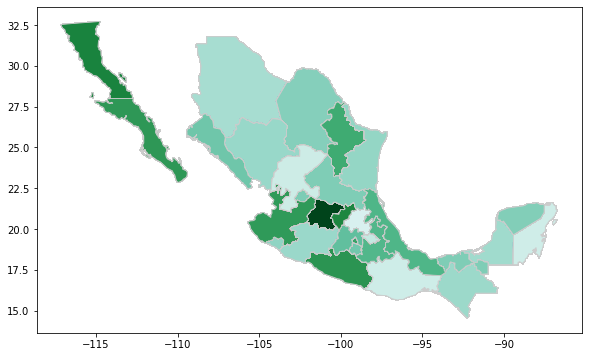

In [75]:
# set the range for the choropleth
vmin, vmax = 10, 5000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column='Precio promedio', cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='0.8')

In [ ]:
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
#saving our map as .png file.